# Seaborn intro

In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn

In [2]:
from scipy import stats

In [22]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
# plt.hist.edgecolor='black'

In [4]:
%matplotlib inline

## Histograms

(array([  5.,   4.,  16.,  16.,  19.,  16.,  13.,   5.,   3.,   3.]),
 array([-2.37371912, -1.87902329, -1.38432747, -0.88963164, -0.39493582,
         0.09976001,  0.59445583,  1.08915166,  1.58384748,  2.07854331,
         2.57323913]),
 <a list of 10 Patch objects>)

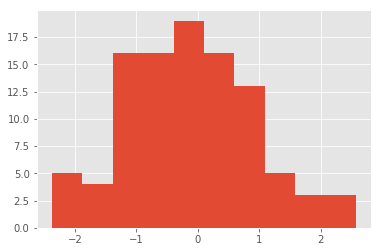

In [23]:
dataset1 = randn(100)
plt.hist(dataset1)

(array([ 11.,  19.,  14.,  23.,  12.,  11.,   5.,   3.,   1.,   1.]),
 array([-1.69638748, -1.2118951 , -0.72740272, -0.24291034,  0.24158204,
         0.72607442,  1.2105668 ,  1.69505918,  2.17955156,  2.66404394,
         3.14853632]),
 <a list of 10 Patch objects>)

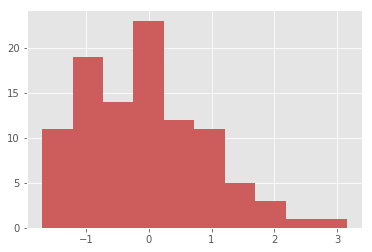

In [11]:
dataset2 = randn(100)
plt.hist(dataset2,color='indianred')

(array([ 0.16512128,  0.28896223,  0.37152287,  0.41280319,  0.20640159,
         0.37152287,  0.41280319,  0.53664415,  0.24768191,  0.24768191,
         0.16512128,  0.28896223,  0.16512128,  0.04128032,  0.08256064,
         0.04128032,  0.04128032,  0.        ,  0.        ,  0.04128032]),
 array([ -1.69638748e+00,  -1.45414129e+00,  -1.21189510e+00,
         -9.69648908e-01,  -7.27402718e-01,  -4.85156528e-01,
         -2.42910338e-01,  -6.64147722e-04,   2.41582042e-01,
          4.83828232e-01,   7.26074423e-01,   9.68320613e-01,
          1.21056680e+00,   1.45281299e+00,   1.69505918e+00,
          1.93730537e+00,   2.17955156e+00,   2.42179775e+00,
          2.66404394e+00,   2.90629013e+00,   3.14853632e+00]),
 <a list of 20 Patch objects>)

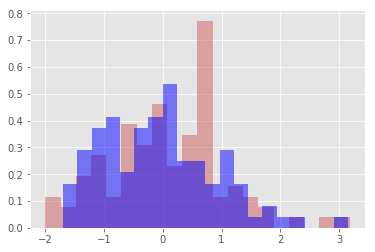

In [12]:
plt.hist(dataset1,normed=True,color='indianred',alpha=0.5,
        bins=20)
plt.hist(dataset2,normed=True,color='blue',alpha=0.5,
        bins=20)

In [13]:
data1 = randn(1000)
data2 = randn(1000)

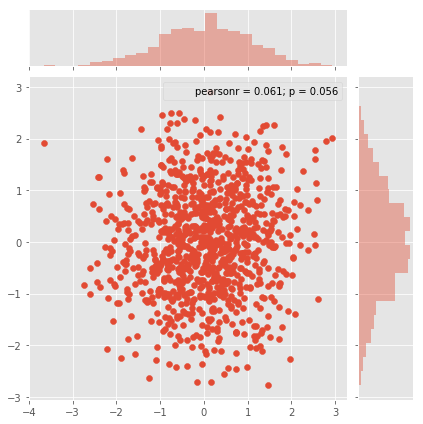

In [14]:
sns.jointplot(data1,data2)

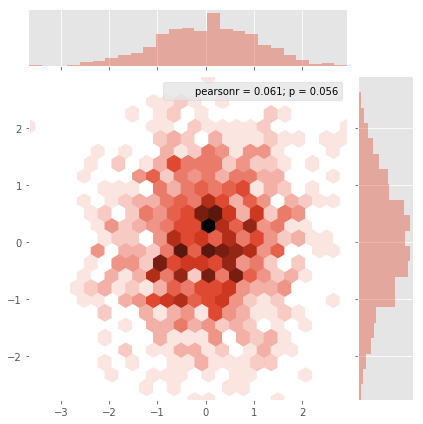

In [15]:
sns.jointplot(data1,data2,kind='hex')

# Kernel Density Estimation Plots

In [16]:
# Rug plots
kdata = randn(25)

(0, 1)

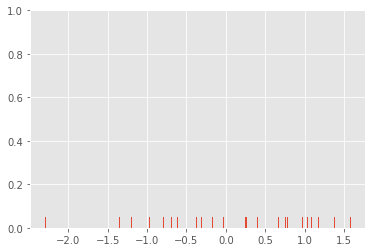

In [18]:
sns.rugplot(kdata)
plt.ylim(0,1)

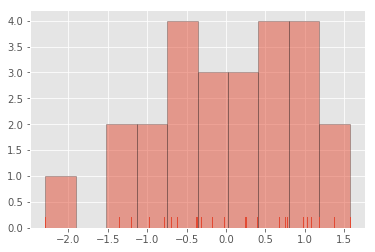

In [24]:
plt.hist(kdata,alpha=0.5,edgecolor='black')
sns.rugplot(kdata)

(0, 1)

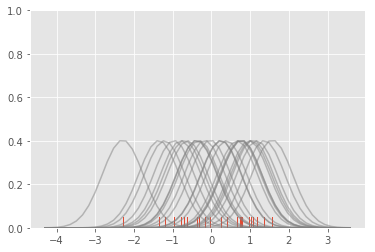

In [27]:
# Manual
sns.rugplot(kdata)
xmin = kdata.min() - 2
x_max = kdata.max() + 2
xax = np.linspace(xmin,x_max)
bandwidth = ((4*kdata.std()**5) / (3*len(kdata)))**0.2
kernl = []
for i in kdata:
    kern = stats.norm(i,bandwidth).pdf(xax)
    kernl.append(kern)
    kern = kern / kern.max()
    kern = kern * 0.4
    
    plt.plot(xax,kern,color='grey',alpha=0.5)
plt.ylim(0,1)

Text(0.5,0.98,'Sum of the basis functions')

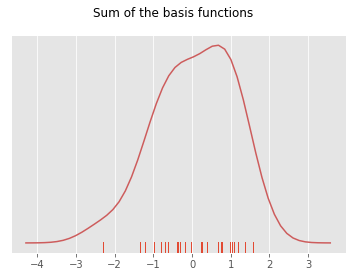

In [31]:
sum_of_kde = np.sum(kernl,axis=0)
fig = plt.plot(xax,sum_of_kde,color='indianred')
sns.rugplot(kdata)
plt.yticks([])
plt.suptitle('Sum of the basis functions')

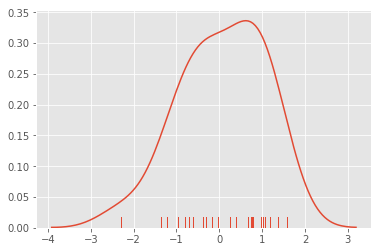

In [33]:
# Seaborn's shortcut
sns.kdeplot(kdata)

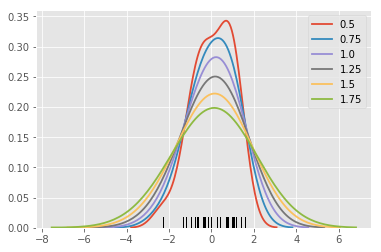

In [34]:
sns.rugplot(kdata,color='black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(kdata,bw=bw,lw=1.8,label=bw)

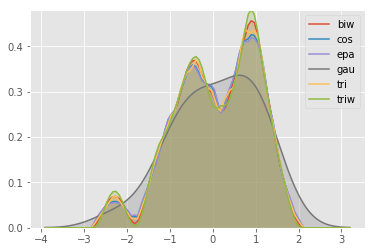

In [37]:
kernelop = ['biw','cos','epa','gau','tri','triw']
for kern in kernelop:
    sns.kdeplot(kdata,kernel=kern,label=kern,shade=True)

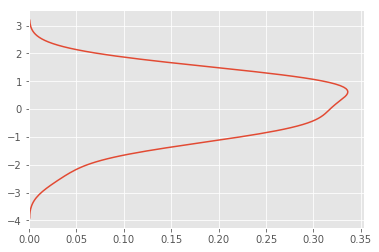

In [38]:
sns.kdeplot(kdata,vertical=True)

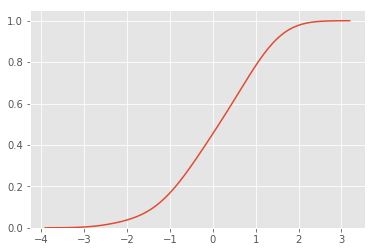

In [39]:
sns.kdeplot(kdata,cumulative=True)

C:\Users\sharan\Anaconda3\lib\site-packages\seaborn\distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


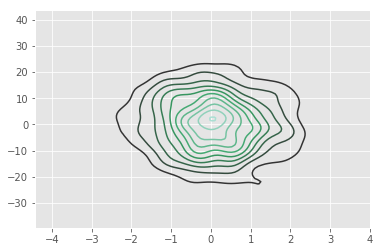

In [41]:
mean = [0,0]
cov = [[1,0],[0,100]]
kdata2 = np.random.multivariate_normal(mean,cov,1000)
dframe = pd.DataFrame(kdata2,columns=['X','Y'])
sns.kdeplot(dframe)

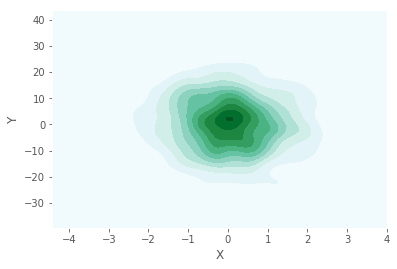

In [44]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

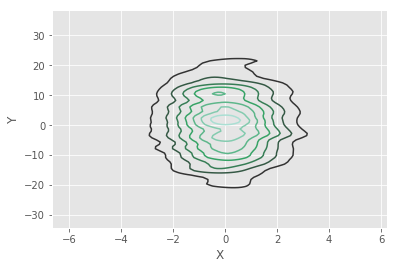

In [45]:
sns.kdeplot(dframe.X,dframe.Y,bw=1)

C:\Users\sharan\Anaconda3\lib\site-packages\seaborn\distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


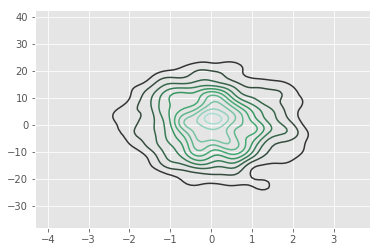

In [46]:
sns.kdeplot(dframe,bw='silverman')

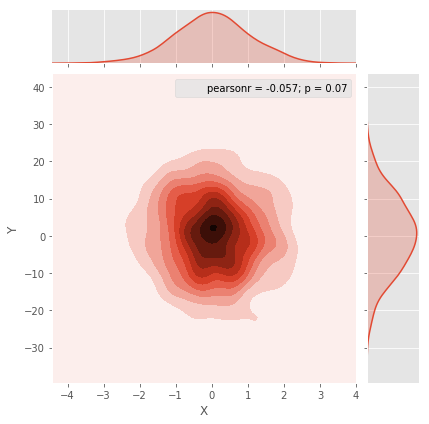

In [51]:
sns.jointplot('X','Y',dframe,kind='kde')